Downloading...
From: https://drive.google.com/uc?id=1S63M075IoFHTyAAYkxGDet6IOI4T5t5S
To: /content/dummy_data.csv
100%|██████████| 16.6k/16.6k [00:00<00:00, 24.8MB/s]


Number of Jobs	Greedy Time (seconds)	Dynamic Programming Time (seconds)
10		0.000021			0.000870
50		0.000042			0.051417
100		0.000092			0.175785
200		0.000190			0.871990
300		0.000256			1.028087
400		0.000295			1.487510
500		0.000221			1.366379


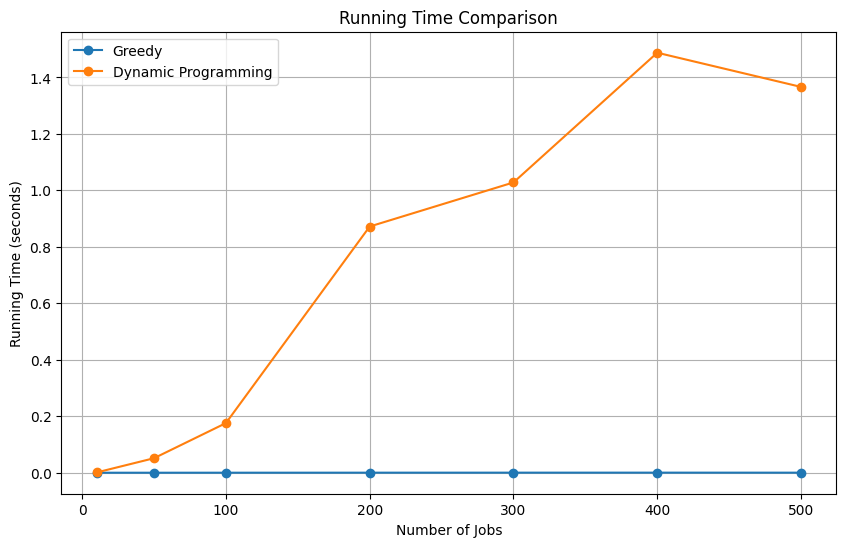

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import gdown

# Download the data from Google Drive
dummy_data_path = 'https://drive.google.com/uc?id=1S63M075IoFHTyAAYkxGDet6IOI4T5t5S'
output_path = 'dummy_data.csv'
gdown.download(dummy_data_path, output_path, quiet=False)

# Load the dummy data
dummy_data = pd.read_csv(output_path, delimiter=';')

# Define the Job class
class Job:
    def __init__(self, job_id, processing_time, due_date):
        self.job_id = job_id
        self.processing_time = processing_time
        self.due_date = due_date

# Convert the data to a list of Job objects
jobs = [Job(row['ID'], row['Processing_Time'], row['Due_Date']) for index, row in dummy_data.iterrows()]

# Implement the Greedy algorithm
def greedy_schedule(jobs):
    jobs.sort(key=lambda job: job.due_date)
    current_time = 0
    total_late = 0

    for job in jobs:
        current_time += job.processing_time
        if current_time > job.due_date:
            total_late += (current_time - job.due_date)

    return total_late

# Implement the Dynamic Programming algorithm
def dynamic_programming_schedule(jobs):
    n = len(jobs)
    max_time = sum(job.processing_time for job in jobs)

    dp = [[float('inf')] * (max_time + 1) for _ in range(n + 1)]
    dp[0][0] = 0

    for i in range(1, n + 1):
        job = jobs[i - 1]
        for t in range(max_time + 1):
            if t >= job.processing_time:
                dp[i][t] = min(dp[i][t], dp[i - 1][t - job.processing_time] + max(0, t - job.due_date))
            dp[i][t] = min(dp[i][t], dp[i - 1][t])

    return min(dp[n])

# Measure running times for different numbers of jobs
num_jobs_list = [10, 50, 100, 200, 300, 400, 500]
greedy_times = []
dp_times = []

for num_jobs in num_jobs_list:
    subset_jobs = jobs[:num_jobs]

    start_time = time.time()
    greedy_schedule(subset_jobs)
    greedy_times.append(time.time() - start_time)

    start_time = time.time()
    dynamic_programming_schedule(subset_jobs)
    dp_times.append(time.time() - start_time)

# Print running times in the terminal
print("Number of Jobs\tGreedy Time (seconds)\tDynamic Programming Time (seconds)")
for num_jobs, greedy_time, dp_time in zip(num_jobs_list, greedy_times, dp_times):
    print(f"{num_jobs}\t\t{greedy_time:.6f}\t\t\t{dp_time:.6f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_jobs_list, greedy_times, label='Greedy', marker='o')
plt.plot(num_jobs_list, dp_times, label='Dynamic Programming', marker='o')

plt.xlabel('Number of Jobs')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time Comparison')
plt.legend()
plt.grid(True)
plt.show()
